In [1]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.layers import concatenate
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [21]:
# tf.fonctions
def train_step(x_train,y_train):
    with tf.GradientTape(persistent=True) as tape:
        y = model(x_train)
        mu = tf.math.sin(x_train)-y
        loss = tf.math.reduce_mean(tf.math.square(mu))
    grad=tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grad,model.trainable_variables))
    return loss

In [3]:
#fix random seed for reproductability and generate data
seed=7
np.random.seed(seed)

#create training and validation data
N=100
1
X_train1=np.linspace(0.0,1.0,N)
y_train1=np.sin(2*np.pi*X_train1)

X_val1=np.random.rand(N)
X_val1=np.sort(X_val1)
y_val1=np.sin(2*np.pi*X_val1)

X_train1=tf.Variable(X_train1.reshape(N,1),dtype=tf.float32)
y_train1=tf.Variable(y_train1.reshape(N,1),dtype=tf.float32)
X_val1=tf.Variable(X_val1.reshape(N,1),dtype=tf.float32)
y_val1=tf.Variable(y_val1.reshape(N,1),dtype=tf.float32)

In [4]:
#build model
x0=Input(shape=(1,))

x1=Dense(40,input_dim=1,activation='sigmoid')(x0)
x2=Dense(40,input_dim=1,activation='sigmoid')(x1)
x3=Dense(40,input_dim=1,activation='sigmoid')(x2)

model=Model(inputs=x0, outputs=x3)

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)


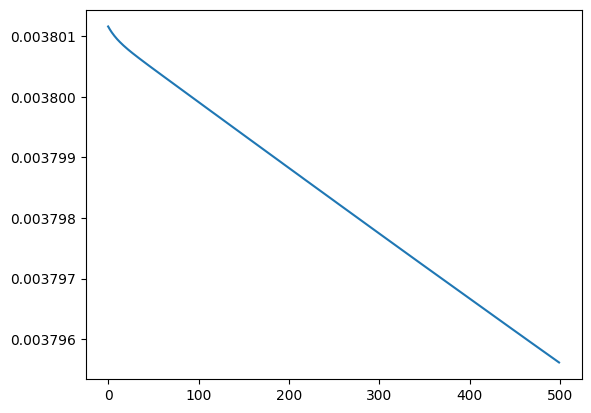

In [22]:
C = np.zeros(500)

for epoch in range(500):
    C[epoch] = train_step(X_train1,y_train1)
    
plt.plot(C)

In [15]:
y_exp = model.predict(X_val1.numpy())
y_sin = np.sin(2*np.pi*X_val1)

Text(0.5, 1.0, 'Training and validation data for output 1')

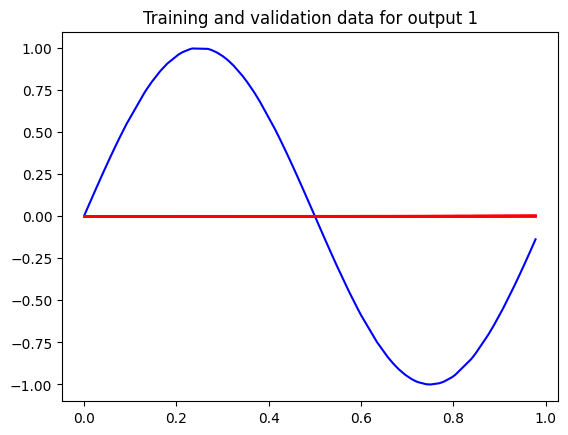

In [16]:
plt.plot(X_val1,y_sin,'b')
plt.plot(X_val1,y_exp,'r')
plt.title('Training and validation data for output 1')